# Background

Spotify is a digital music streaming service that offers users access to millions of songs, podcasts, and videos from artists all around the world. Started in Sweden in 2006, Spotify has grown exponentially to become one of the leading music streaming platforms globally. As of 2021, it has over 365 million monthly active users, including more than 165 million paying subscribers.

Spotify operates under a freemium model, offering users a basic, ad-supported service for free, while premium subscribers pay for additional features like ad-free listening and offline playback. Spotify's vast catalog, spanning virtually every genre of music, allows users to not only listen to their favorite songs but also discover new music.

Spotify's Recommender Engine

Spotify's recommender system is one of its defining features. It plays a crucial role in curating personalized content and creating a unique listening experience for each user. The engine leverages a mixture of collaborative filtering, natural language processing (NLP), audio analysis, and deep learning techniques to recommend songs and artists to users.

Collaborative filtering identifies patterns in user behavior to make recommendations. It operates under the assumption that if users A and B both like song X, and user A also likes song Y, then it's likely that user B will also enjoy song Y.

Natural language processing (NLP) is used to analyze textual data like playlist titles, song descriptions, and artist biographies to extract meaningful patterns and associations.

Audio analysis focuses on the music itself, extracting features like tempo, rhythm, key, and loudness. This approach allows Spotify to recommend songs that are musically similar.

Deep learning, involving complex neural networks, helps Spotify make recommendations by learning from vast amounts of data and recognizing complex patterns. These networks are trained using both explicit feedback (such as likes and skips) and implicit feedback (such as the amount of time a user spends listening to a song or the time of day they listen).

Spotify's personalized playlists, such as Discover Weekly and Daily Mixes, are examples of the recommender engine in action. These playlists, tailored to each user's unique musical tastes and listening habits, exemplify the power of machine learning in creating personalized experiences.

Before we proceed with the workshop, I highly encourage everyone to watch this video to understand Spotify's recommender system in more detail. This will serve as the foundation of recommneder engine and deep learning for the rest of the week. In this video, Spotify's engineers share insights about the complex algorithms and vast datasets that power their recommendation engine.

https://www.youtube.com/watch?v=pGntmcy_HX8

Now, let's dive into the world of recommender systems by creating a simplified version of a music recommendation engine using Spotify's track data!

# Objective

The main objective of this code is to build a song recommendation engine using Spotify dataset. The dataset contains various features of songs such as acousticness, danceability, energy, instrumentalness, liveness, speechiness, and valence.

We will use these features to group or cluster the songs using the KMeans clustering algorithm, a popular machine learning algorithm for cluster analysis. The algorithm aims to partition the songs into clusters in which each song belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

After the clusters are created, the model will recommend songs to the user based on their favorite songs. The recommendations are made by identifying the cluster that most of the user's favorite songs belong to, and then suggesting other songs from the same cluster. The assumption here is that songs within the same cluster have similar features and therefore the user is likely to enjoy them.

The final output of the code is a list of song recommendations that are similar in nature to the user's favorite songs.

# Import necessary libraries

First, we import the libraries that we will need for this project. This includes pandas for data manipulation and KMeans from sklearn.cluster for the clustering algorithm.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from scipy.stats import zscore
print(torch.cuda.is_available())

False


# Load the Spotify dataset

Next, we load the Spotify dataset into a pandas DataFrame. This assumes that the .csv file is located in the same directory as the Python script. If not, you would need to provide the full path to the file.

In [2]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("../datasets/spotify_tracks.csv")

In [3]:
tracks_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [4]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
tracks_df.head()
tracks_df.isnull().sum() #check for missing values

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# Spotify Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

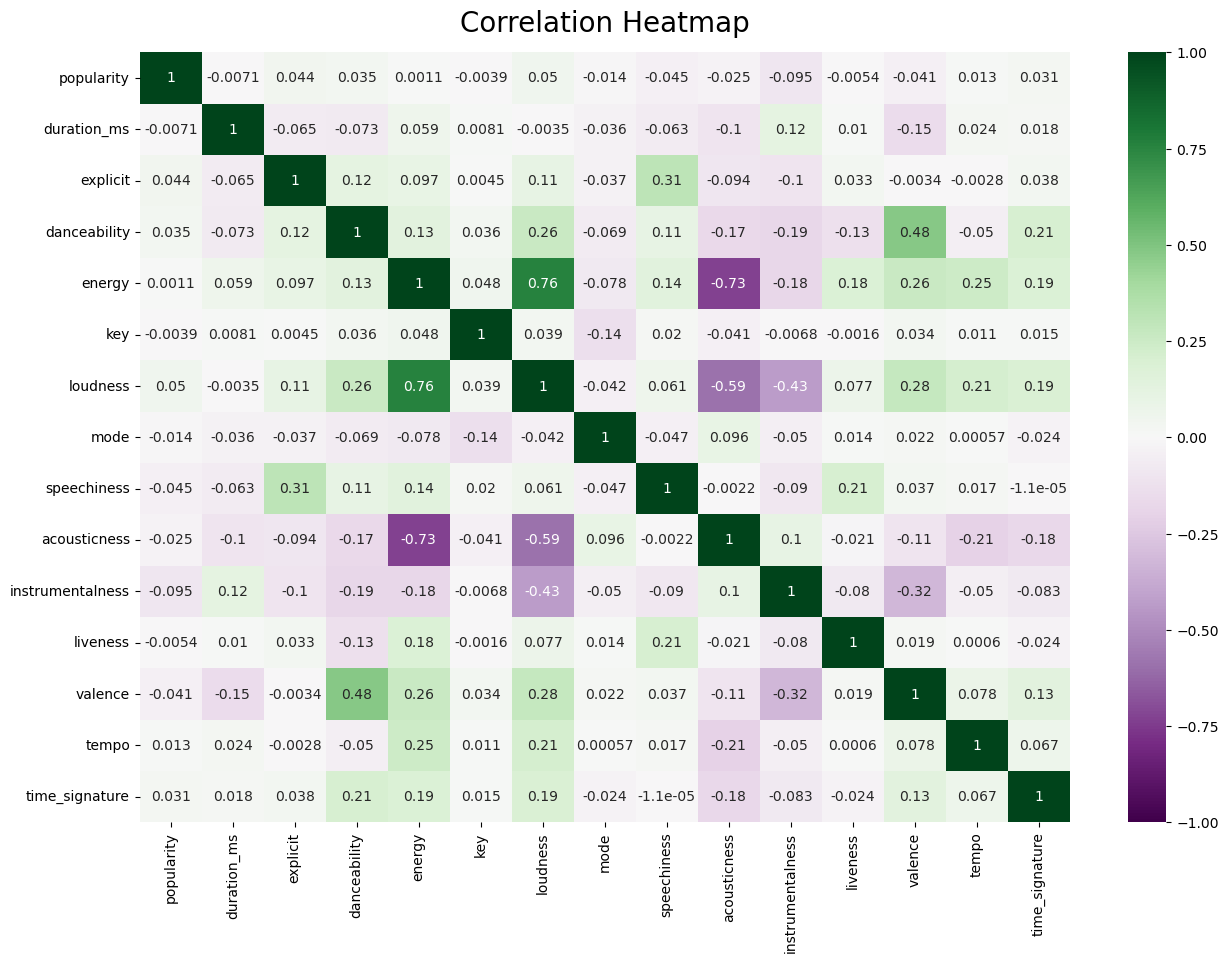

In [6]:
#Correlation Heatmap of tracks_df
tracks_df.drop(columns = ['Unnamed: 0']).corr() #tracks_df without song ID
 
plt.figure(figsize=(15, 10)) #Sets heatmap size
tracks_df_heatmap = sns.heatmap(tracks_df.drop(columns = ['Unnamed: 0']).corr(), vmin = -1, vmax = 1, annot = True, cmap = "PRGn")
tracks_df_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15) #Adds title to heatmap

# Select necessary features for clustering

We then select the features that we will use for clustering. These features are selected based on their relevance to the kind of music a person might like.

In [7]:
# Select only necessary features for clustering
# Features such as lyrics is important but is not numerical so must be removed
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","loudness"]]

# One hot encoding


In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

data_transformed = pd.DataFrame()

for column in tracks.columns:
    if tracks[column].dtypes == 'object':
        one_hot = pd.DataFrame(ohe.fit_transform(tracks[[column]]))
        one_hot.columns = [f"{column}_{c}" for c in one_hot.columns]
        data_transformed = pd.concat([data_transformed, one_hot], axis = 1)
    else:
        data_transformed = pd.concat([data_transformed, tracks[[column]]], axis = 1)
        
data = data_transformed

# Visualizations


C:\Users\Bryan\AppData\Local\Temp\ipykernel_23356\3025826115.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  tracks.hist(ax=ax, bins = 100)


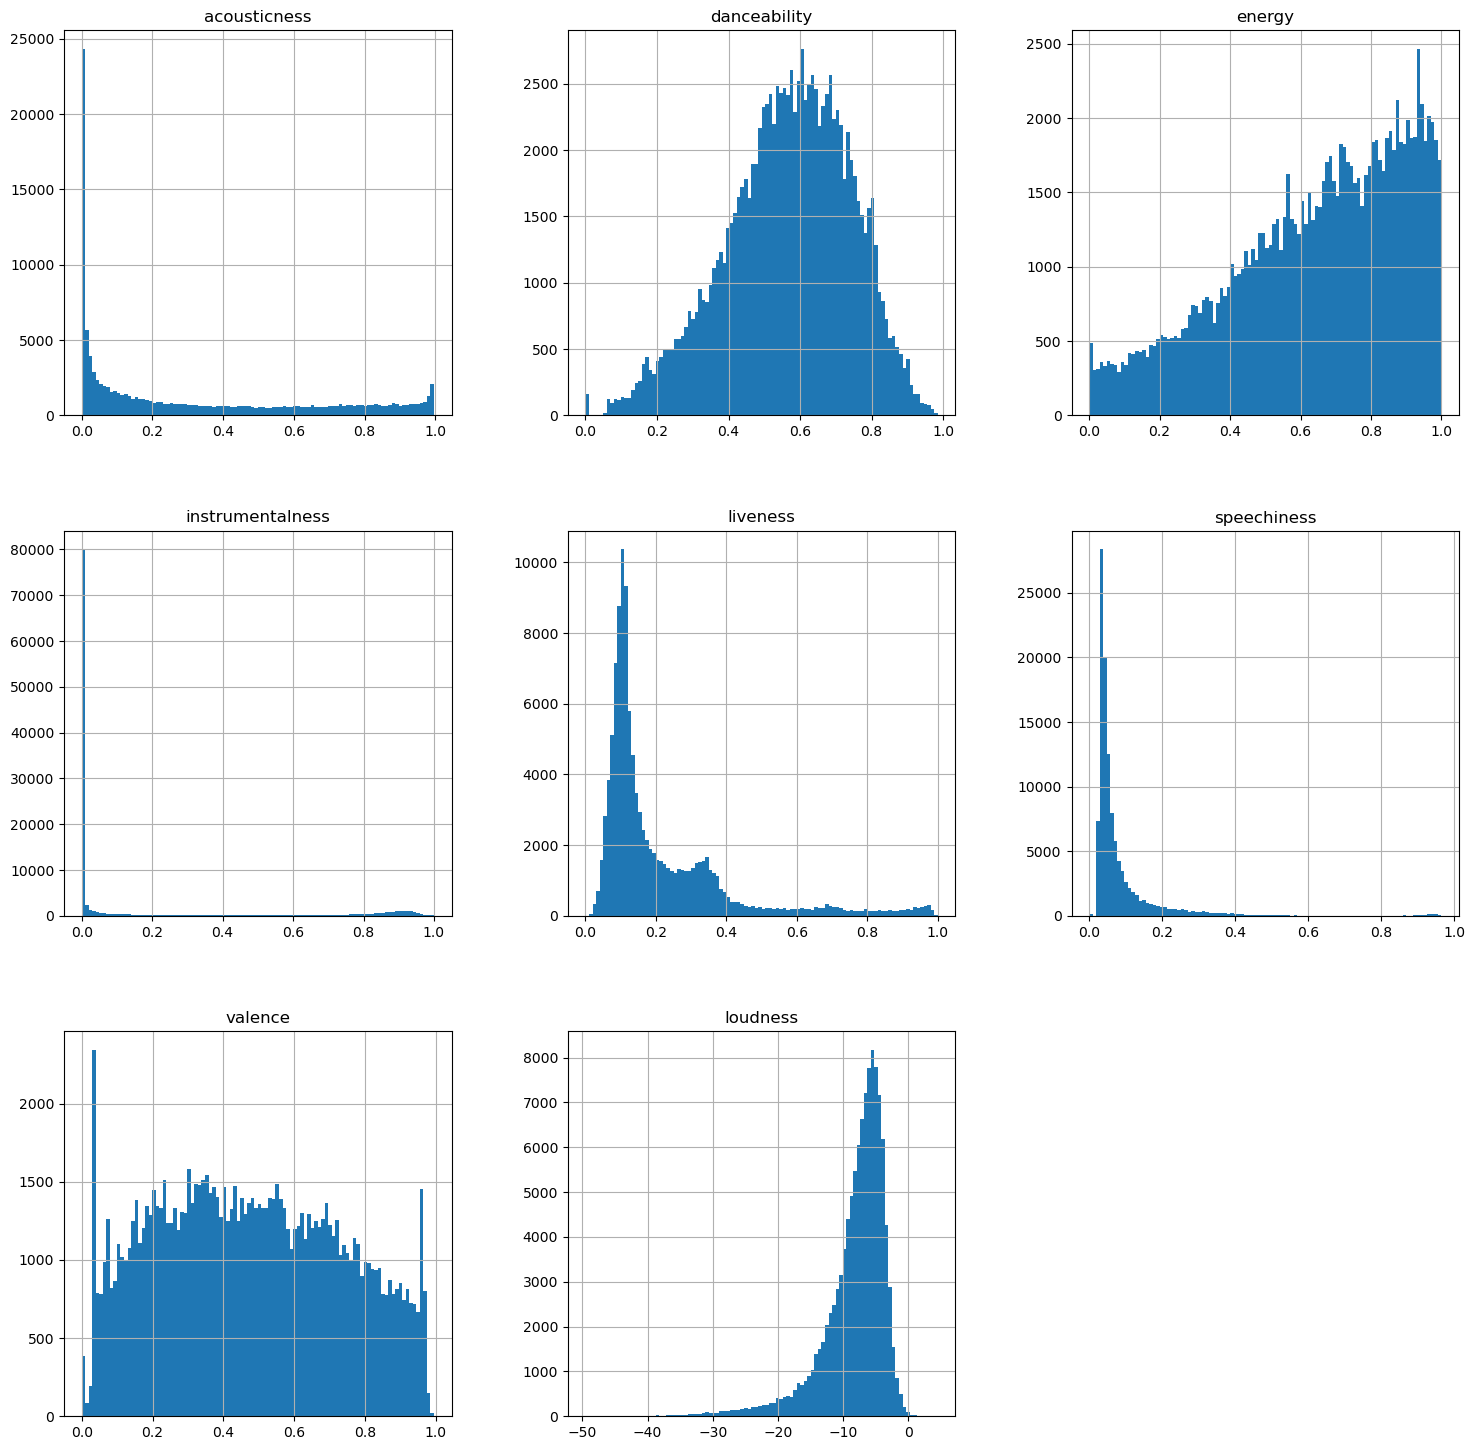

In [9]:
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
tracks.hist(ax=ax, bins = 100)
plt.show()

# Initialize and train the KMeans model

Here, we initialize the KMeans model with 5 clusters. This means that we aim to divide our data into 6 different groups. We then train our model using the selected features.

KMeans(n_clusters=6)

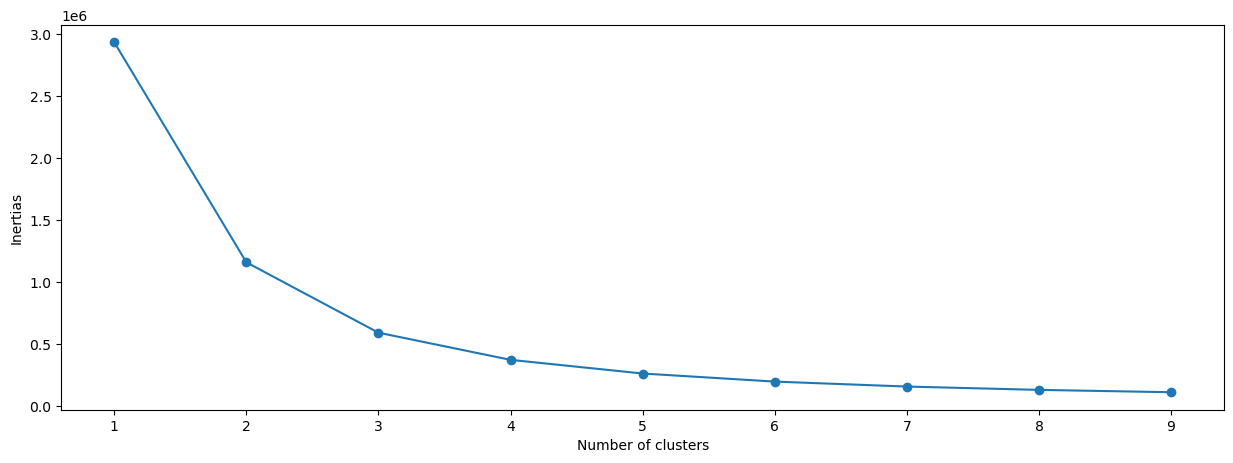

In [10]:
# Determining the optimal number of clusters
means = []
inertias = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(tracks)
    
    means.append(k)
    inertias.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(means,inertias,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.grid = True
plt.show
    
#Based off the plot, diminishing returns start being most evident at around clusters>6, so 6 is a good number.
tracks_zscored = tracks.apply(zscore)

kmeans = KMeans(n_clusters = 6)
kmeans.fit(tracks_zscored)

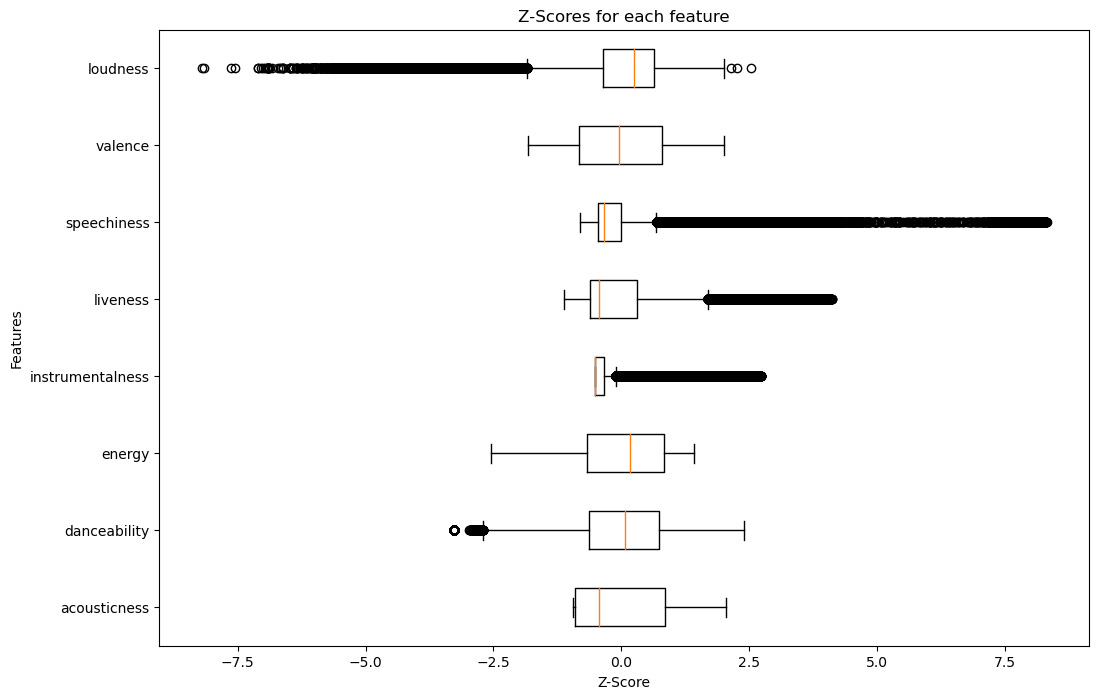


Potential Outliers:
        acousticness  danceability    energy  instrumentalness  liveness  \
116         1.564080     -0.010373 -2.394099          0.087062 -0.507167   
270         1.293421      0.295030 -2.219963         -0.503715 -0.354837   
284         1.807674      0.963458 -2.381774         -0.504112 -0.554442   
343         1.897894     -0.874720 -0.088987         -0.504023  3.075201   
518         1.383641     -0.920818 -1.130621         -0.500720  3.815837   
...              ...           ...       ...               ...       ...   
113968      2.003150      0.081824 -2.304248          2.571286 -0.591211   
113971      1.618212     -1.468238 -2.418748          2.245009 -0.522925   
113972      1.684373     -2.286486 -2.343210          2.416223 -0.444134   
113977      1.970069     -2.878852 -2.190940          2.652047 -0.633233   
113979      1.831732     -0.863195  1.294557          2.590668  2.534169   

        speechiness   valence  loudness  
116       -0.375025  0.4

In [11]:
# Visualize Z-scores using box plots
plt.figure(figsize=(12, 8))
plt.boxplot(tracks_zscored.values, vert=False, labels=tracks_zscored.columns)
plt.title("Z-Scores for each feature")
plt.xlabel("Z-Score")
plt.ylabel("Features")
plt.show()

# Identify potential outliers
outliers = tracks_zscored[(tracks_zscored.abs() > 3).any(axis=1)]

# Print the potential outliers
print("\nPotential Outliers:")
print(outliers)

In [12]:
# Train the model with our data
kmeans.fit(tracks)

KMeans(n_clusters=6)

# Assign cluster numbers to each track

After training the model, we add a new column to our DataFrame that represents the cluster each track belongs to. This is done using the labels_ attribute of the KMeans model.

In [13]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_

# Save the DataFrame as a new CSV file

Once we have the cluster information added to our DataFrame, we save it as a new CSV file. This way, we don't have to perform the clustering every time we want to make a recommendation.

In [14]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

# User input for favorite songs

Here, we prompt the user to enter the ids of their favorite songs. The ids should be separated by commas.

In [15]:
# Prompt the user to enter their favorite songs' IDs as a comma-separated input
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['track_id'].isin(ids)]
print(favorites)

#  4LbWtBkN82ZRhz9jqzgrb3,1WFVfVjCtbmdIv7j3Fa9iy

Enter comma-separated ids of your favorite songs
> 4LbWtBkN82ZRhz9jqzgrb3,1WFVfVjCtbmdIv7j3Fa9iy
       Unnamed: 0                track_id                   artists  \
14             14  4LbWtBkN82ZRhz9jqzgrb3  Chord Overstreet;Deepend   
41             41  1WFVfVjCtbmdIv7j3Fa9iy            Brandi Carlile   
34222       34222  1WFVfVjCtbmdIv7j3Fa9iy            Brandi Carlile   

             album_name         track_name  popularity  duration_ms  explicit  \
14      Hold On (Remix)    Hold On - Remix          56       188133     False   
41     Mellow Adult Pop  When You're Wrong           0       266960     False   
34222  Mellow Adult Pop  When You're Wrong           0       266960     False   

       danceability  energy  ...  mode  speechiness  acousticness  \
14            0.755   0.780  ...     1       0.0327         0.124   
41            0.568   0.301  ...     0       0.0373         0.796   
34222         0.568   0.301  ...     0       0.0373         0.796   

       instrumen

# Identify the user's favorite cluster

After getting the user's favorite songs, we identify the cluster that these songs most frequently belong to. This is done by counting the occurrences of each cluster number in the 'type' column of the user's favorite songs.

In [16]:
# Find out the most frequent cluster among the user's favorite songs

clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')



Favorite cluster: 0 



# Make song recommendations

Finally, we make song recommendations based on the user's favorite cluster. We do this by filtering our DataFrame to only include songs that belong to this cluster. We then print the first 5 songs as recommendations.

In [17]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
print(suggestions.head())

   Unnamed: 0                track_id                               artists  \
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   

                            album_name            track_name  popularity  \
2                       To Begin Again        To Begin Again          57   
4                              Hold On               Hold On          82   
5                 Days I Will Remember  Days I Will Remember          58   
6          Is There Anybody Out There?         Say Something          74   
7  We Sing. We Dance. We Steal Things.             I'm Yours          80   

   duration_ms  explicit  danceability  energy  ...  mode  speechine

# Collecting user feedback

In [18]:
feedback = []
feedback_input = input("Type Y/N if these suggestions are good.")
feedback.append(feedback_input)
if feedback_input == 'N':
    print(suggestions.head(10))
    print('Heres 5 more songs which we hope you might like.')

Type Y/N if these suggestions are good.N
    Unnamed: 0                track_id                               artists  \
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
15          15  1KHdq8NK9QxnGjdXb55NiG                           Landon Pigg   

                             album_name                        track_name  \
2